In [1]:
#### Importing package dependencies
import sys, os,math
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
from datetime import datetime
import numpy as np
import warnings
import seaborn as sns
sns.set(font_scale=1.5)
warnings.filterwarnings('ignore')

In [2]:
########## Reading visits.csv from monthly directories into a data frame
dir_list = [x[0] for x in os.walk('./Data/') ]

df = pd.concat(map(pd.read_csv, [dr+'/visits.csv' for dr in dir_list[1:]]))

df

,patient_id,medical_id,gender,entry_unit,entry_group,first_department,first_ward,entry_date,hospitalization_date,exit_date,...,hospitalization_time,exit_day,exit_time,ED_dur,ED_dur_hours,hospitalization_dur,hospitalization_dur_hours,hospitalization_dur_days,age,num_dep
0,10000047,20681518,2,12,2,62,62,02/09/06 09:41:59,02/09/06 09:41:59,02/09/06 10:35:00,...,1139478119,13188,1139481300,0,0,3181,0,0,66,1
1,10000053,20680029,2,12,2,62,62,02/01/06 08:13:25,02/01/06 08:13:25,02/01/06 10:54:18,...,1138781605,13180,1138791258,0,0,9653,2,0,60,1
2,10000073,20180733,2,11,1,11,77,02/13/06 22:40:33,02/13/06 23:55:00,02/15/06 10:50:45,...,1139874900,13194,1140000645,4467,1,125745,34,1,28,2
3,10000083,20648418,2,12,2,78,78,02/16/06 10:58:11,02/16/06 10:58:11,02/16/06 12:30:00,...,1140087491,13195,1140093000,0,0,5509,1,0,46,1
4,10000090,20062089,2,1,1,1,43,02/08/06 11:14:33,02/08/06 17:10:05,02/15/06 14:50:00,...,1139418605,13194,1140015000,21332,5,596395,165,6,67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13466,10310380,20688790,1,12,2,88,88,08/29/07 10:01:57,08/29/07 10:01:57,08/31/07 15:00:00,...,1188381717,13756,1188572400,0,0,190683,52,2,77,1
13467,10310530,20689657,1,12,2,88,88,08/25/07 20:05:37,08/25/07 20:05:37,08/27/07 16:00:00,...,1188072337,13752,1188230400,0,0,158063,43,1,77,1
13468,10310569,20689801,1,12,2,88,88,08/29/07 10:41:43,08/29/07 10:41:43,08/31/07 15:00:00,...,1188384103,13756,1188572400,0,0,188297,52,2,87,1
13469,10310574,20689825,1,12,2,88,88,08/29/07 11:09:24,08/29/07 11:09:24,08/31/07 15:00:00,...,1188385764,13756,1188572400,0,0,186636,51,2,73,1


In [3]:
###### converting date to a datetime64
df['entry_date']= df['entry_date'].astype('datetime64[s]')

In [4]:
## Selecting the date range to analyse


start = '01-01-2004'
end = '11-01-2007'
# end = '01-01-2007'

df_sub = df[df['entry_date'].between(start, end, inclusive=False)]
idx = pd.date_range(start,end,freq = 'H')

In [5]:
##### Round to hourly entries and count per hour

df_sub['hour'] = (df_sub['entry_date'].dt.round('H'))
df_sub = df_sub.groupby(['hour']).size().reset_index(name='Number of Patients')

In [6]:
## Add rows with hours that have no arrivals

df_sub.index = pd.DatetimeIndex(df_sub['hour'])
df_sub = df_sub.reindex(idx, fill_value=0).drop(columns=['hour'])
df_sub.index.name = 'hour'
df_sub = df_sub.reset_index()
df_sub['hour'] = pd.to_datetime(df_sub['hour'])
df_sub

,hour,Number of Patients
0,2004-01-01 00:00:00,5
1,2004-01-01 01:00:00,11
2,2004-01-01 02:00:00,8
3,2004-01-01 03:00:00,4
4,2004-01-01 04:00:00,5
...,...,...
33596,2007-10-31 20:00:00,15
33597,2007-10-31 21:00:00,23
33598,2007-10-31 22:00:00,19
33599,2007-10-31 23:00:00,16


In [7]:
## hours with no patients
df_sub[df_sub['Number of Patients']==0]

,hour,Number of Patients
29,2004-01-02 05:00:00,0
339,2004-01-15 03:00:00,0
438,2004-01-19 06:00:00,0
677,2004-01-29 05:00:00,0
797,2004-02-03 05:00:00,0
...,...,...
29210,2007-05-02 02:00:00,0
29694,2007-05-22 06:00:00,0
30173,2007-06-11 05:00:00,0
31446,2007-08-03 06:00:00,0


In [8]:
##### Creating features from the date column

## HOD: Hour Of Day
## month
## year
## day
## DOW: Day Of Week
## DOY: Day Of Year
## WOY: Week Of Year
## QOD: Quarter Of Day
## HOW: Hour Of Week

df_sub['HOD']=df_sub['hour'].dt.hour
df_sub['month']=df_sub['hour'].dt.month
df_sub['year']=df_sub['hour'].dt.year
df_sub['day']=df_sub['hour'].dt.day
df_sub['DOW']=df_sub['hour'].dt.day_name()
df_sub['DOY']=df_sub['hour'].dt.dayofyear
df_sub['WOY']=df_sub['hour'].dt.isocalendar().week
df_sub['QOD']=(df_sub['HOD']/6).apply(np.floor)
df_sub['HOW'] = df_sub['hour'].dt.dayofweek * 24 + (df_sub['hour'].dt.hour + 1)

df_sub = df_sub[['hour','year','month','day','HOD','DOW','DOY','WOY','QOD','HOW','Number of Patients']]
df_main = df_sub
df_sub =  df_sub[df_sub['year']!=2007]

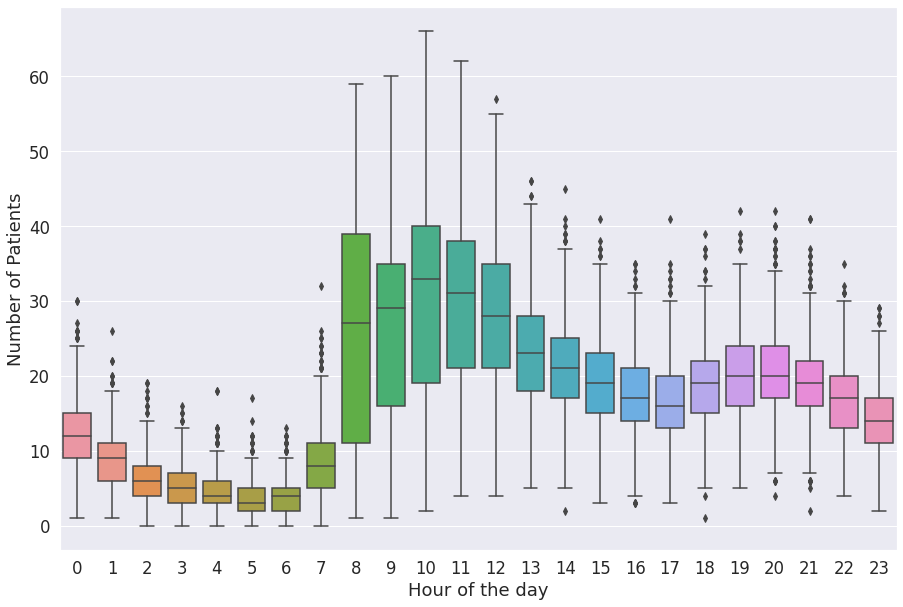

In [9]:
## Looking at trend for Hour Of Day

sns.boxplot(x="HOD",y="Number of Patients",data=df_sub)
plt.xlabel('Hour of the day')
plt.savefig('hourly.png')

<AxesSubplot:xlabel='QOD', ylabel='Number of Patients'>

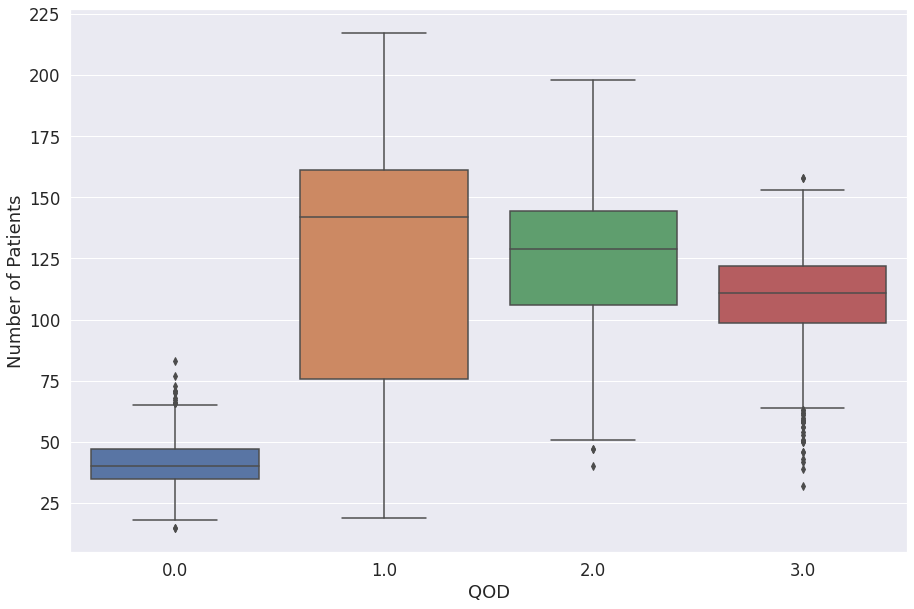

In [10]:
## Looking at trend for Quarter Of Day

df_QOD = df_sub.groupby(['QOD','DOY','year'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.boxplot(x="QOD",y="Number of Patients",data=df_QOD)

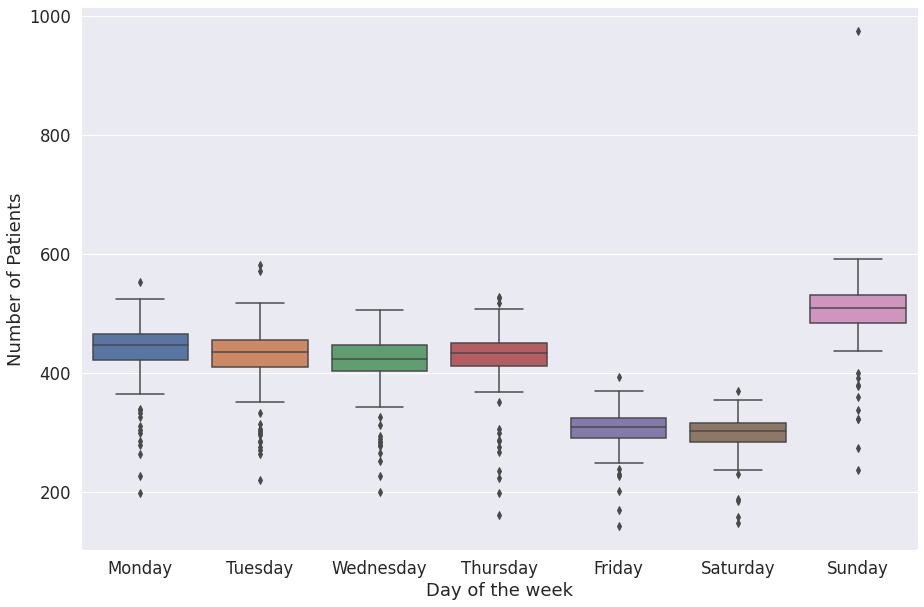

In [11]:
## Looking at trend for Day Of Week

df_DOW = df_sub.groupby(['DOW','WOY','year'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.boxplot(x="DOW",y="Number of Patients",data=df_DOW,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day of the week')
plt.savefig('DOW.png')

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sept'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

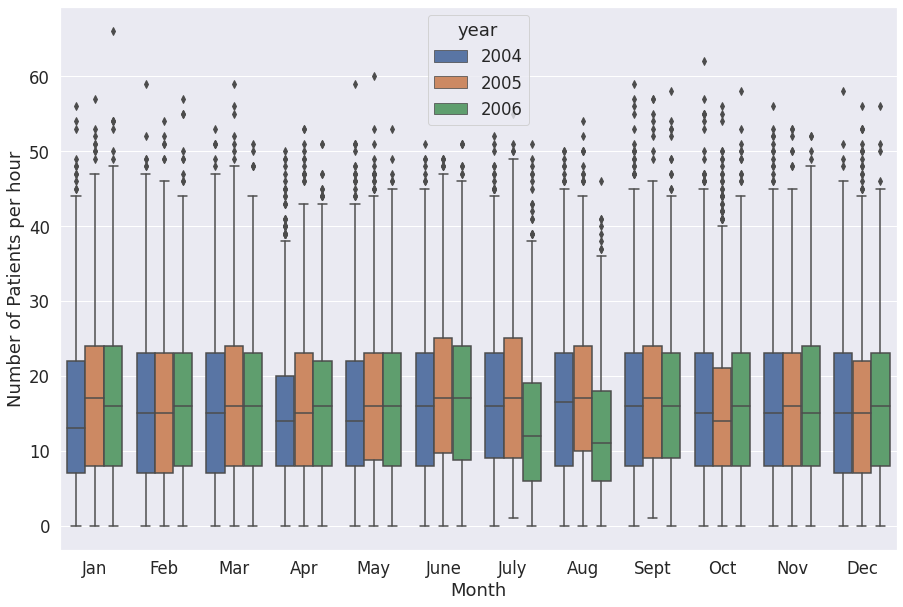

In [12]:
## Looking at trend for Month of the year
fig, ax = plt.subplots()
df_month = df_sub.groupby(['month','year'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.boxplot(x="month",y="Number of Patients",hue='year',data=df_sub)
plt.xlabel('Month')
plt.ylabel('Number of Patients per hour')
plt.savefig('monthly.png')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

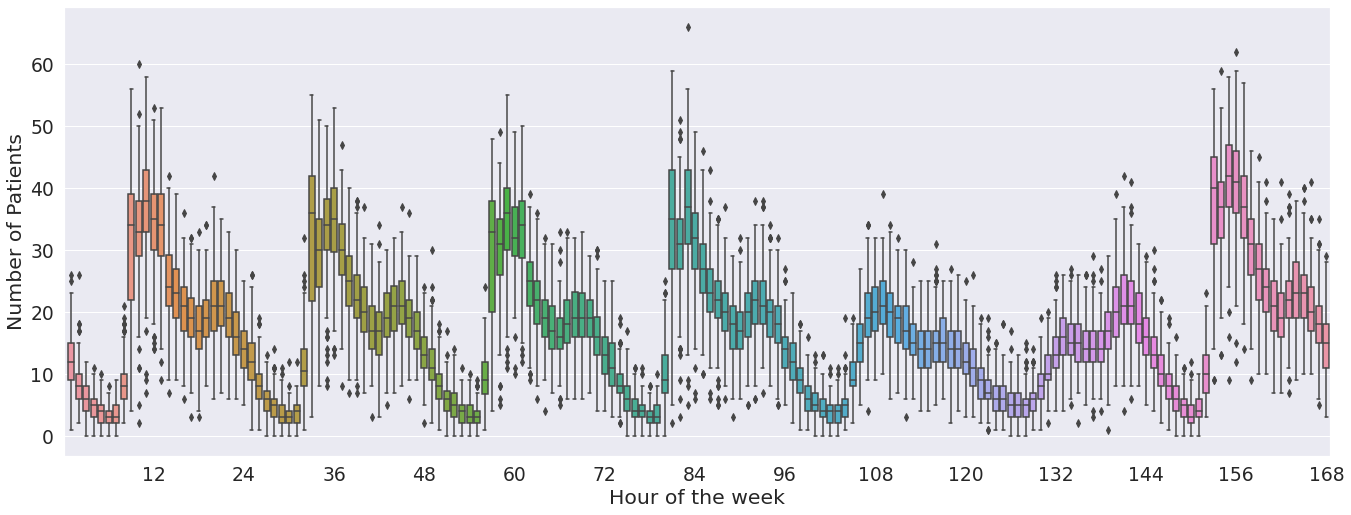

In [13]:
## Looking at trend for Hour Of Week

sns.set(rc={'figure.figsize':(22.7,8.27)})
sns.set(font_scale=1.7)
df_HOW = df_sub.groupby(['HOW','WOY'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.boxplot(x="HOW",y="Number of Patients",data=df_sub)
plt.xlabel('Hour of the week')
plt.xticks(np.arange(-1, 168, 12))
plt.savefig('HOW.png',bbox_inches='tight')

## x axis should be visible plot every x hours

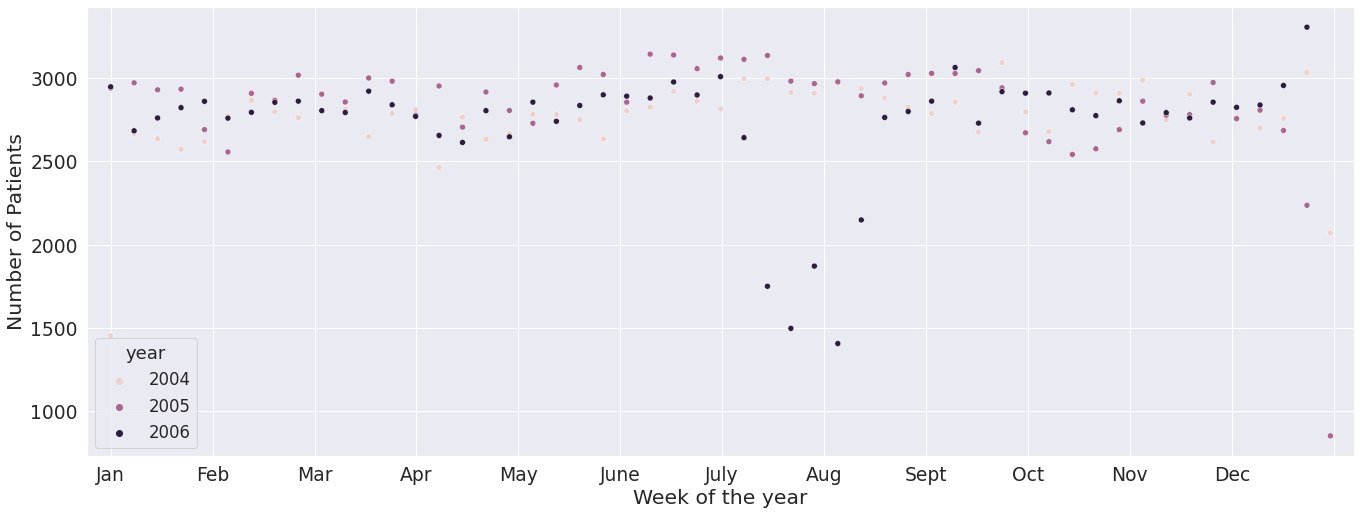

In [14]:
## Looking at trend for Week of Year
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.5)
df_month = df_sub.groupby(['WOY','year'])['Number of Patients'].sum().reset_index(name='Number of Patients')
sns.scatterplot(x="WOY",y="Number of Patients",hue='year',data=df_month)
plt.xlabel('Week of the year')
plt.xlim([0,54])
plt.xticks(np.arange(1, 54, 4.34524166667))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec',''])
plt.savefig('WOY.png')

In [15]:
## Exporting hourly data

df_main.to_csv('hourly.csv')

In [16]:
temp_2004 = pd.read_csv('Data/Haifa_Port_2004_temp.csv')
temp_2004 = temp_2004.pivot(index = 'Date & Time (UTC)' ,columns='Attribute Name',values='Haifa Port')
temp_2004

Attribute Name,Maximum temperature (°C),Minimum temperature (°C)
Date & Time (UTC),,
01/01/2004 00:00,11.4,11.3
01/01/2004 00:10,11.4,11.3
01/01/2004 00:20,11.3,11.3
01/01/2004 00:30,11.3,11.3
01/01/2004 00:40,11.5,11.3
...,...,...
31/12/2004 23:10,15.5,15.4
31/12/2004 23:20,15.6,15.3
31/12/2004 23:30,15.6,15.3


In [17]:
temp_2005 = pd.read_csv('Data/Haifa_Port_2005_temp.csv')
temp_2005 = temp_2005.pivot(index = 'Date & Time (UTC)' ,columns='Attribute Name',values='Haifa Port')
temp_2005

Attribute Name,Maximum temperature (°C),Minimum temperature (°C)
Date & Time (UTC),,
01/01/2005 00:00,15.8,15.6
01/01/2005 00:10,15.6,15.5
01/01/2005 00:20,15.7,15.5
01/01/2005 00:30,16,15.7
01/01/2005 00:40,16,15.9
...,...,...
31/12/2005 23:10,16.3,16.3
31/12/2005 23:20,16.3,16.2
31/12/2005 23:30,16.2,16.1


In [18]:
temp_2006 = pd.read_csv('Data/Haifa_Port_2006_temp.csv')
temp_2006 = temp_2006.pivot(index = 'Date & Time (UTC)' ,columns='Attribute Name',values='Haifa Port')
temp_2006

Attribute Name,Maximum temperature (°C),Minimum temperature (°C)
Date & Time (UTC),,
01/01/2006 00:00,16.1,16
01/01/2006 00:10,16.1,16
01/01/2006 00:20,16.1,16.1
01/01/2006 00:30,16.2,16.1
01/01/2006 00:40,16.3,16.2
...,...,...
31/12/2006 23:10,9.3,9.3
31/12/2006 23:20,9.3,9.3
31/12/2006 23:30,9.4,9.3


In [19]:
temp_2007 = pd.read_csv('Data/Haifa_Port_2007_temp.csv')
temp_2007 = temp_2007.pivot(index = 'Date & Time (UTC)' ,columns='Attribute Name',values='Haifa Port')
temp_2007

Attribute Name,Maximum temperature (°C),Minimum temperature (°C)
Date & Time (UTC),,
01/01/2007 00:00,9.6,9.3
01/01/2007 00:10,9.7,9.6
01/01/2007 00:20,9.8,9.7
01/01/2007 00:30,9.8,9.8
01/01/2007 00:40,10,9.8
...,...,...
31/10/2007 23:10,22.6,22.5
31/10/2007 23:20,22.5,22.5
31/10/2007 23:30,22.5,22.5


In [20]:
temp = pd.concat([temp_2004,temp_2005,temp_2006,temp_2007]).reset_index()
temp['Date & Time (UTC)'] = temp['Date & Time (UTC)'].astype('datetime64[s]')
temp = temp[temp['Date & Time (UTC)'].dt.minute ==0]
temp

Attribute Name,Date & Time (UTC),Maximum temperature (°C),Minimum temperature (°C)
0,2004-01-01 00:00:00,11.4,11.3
6,2004-01-01 01:00:00,11.4,11.4
12,2004-01-01 02:00:00,10.9,10.8
18,2004-01-01 03:00:00,10.7,10.6
24,2004-01-01 04:00:00,10.6,10.5
...,...,...,...
200414,2007-10-31 19:00:00,23.2,23.1
200420,2007-10-31 20:00:00,22.8,22.8
200426,2007-10-31 21:00:00,22.4,22.3
200432,2007-10-31 22:00:00,22.3,22.2


In [21]:
temp= temp.drop_duplicates(subset=['Date & Time (UTC)'])
temp = temp.rename(columns={'Date & Time (UTC)': 'hour'})
temp

Attribute Name,hour,Maximum temperature (°C),Minimum temperature (°C)
0,2004-01-01 00:00:00,11.4,11.3
6,2004-01-01 01:00:00,11.4,11.4
12,2004-01-01 02:00:00,10.9,10.8
18,2004-01-01 03:00:00,10.7,10.6
24,2004-01-01 04:00:00,10.6,10.5
...,...,...,...
200414,2007-10-31 19:00:00,23.2,23.1
200420,2007-10-31 20:00:00,22.8,22.8
200426,2007-10-31 21:00:00,22.4,22.3
200432,2007-10-31 22:00:00,22.3,22.2


In [22]:
temp.index = pd.DatetimeIndex(temp['hour'])
temp = temp.reindex(idx, fill_value=pd.NA).drop(columns=['hour'])
indexes = temp.index[temp['Maximum temperature (°C)']=='-']
temp['Maximum temperature (°C)'][indexes] = pd.NA
temp.index.name = 'hour'
temp = temp.reset_index()
temp['hour'] = pd.to_datetime(temp['hour'])
temp

Attribute Name,hour,Maximum temperature (°C),Minimum temperature (°C)
0,2004-01-01 00:00:00,11.4,11.3
1,2004-01-01 01:00:00,11.4,11.4
2,2004-01-01 02:00:00,10.9,10.8
3,2004-01-01 03:00:00,10.7,10.6
4,2004-01-01 04:00:00,10.6,10.5
...,...,...,...
33596,2007-10-31 20:00:00,22.8,22.8
33597,2007-10-31 21:00:00,22.4,22.3
33598,2007-10-31 22:00:00,22.3,22.2
33599,2007-10-31 23:00:00,22.6,22.5


In [23]:
temp[temp['Minimum temperature (°C)'].isna()]

Attribute Name,hour,Maximum temperature (°C),Minimum temperature (°C)
4116,2004-06-20 12:00:00,NaN,NaN
17973,2006-01-18 21:00:00,NaN,NaN
17974,2006-01-18 22:00:00,NaN,NaN
17975,2006-01-18 23:00:00,NaN,NaN
17976,2006-01-19 00:00:00,NaN,NaN
...,...,...,...
33139,2007-10-12 19:00:00,NaN,NaN
33140,2007-10-12 20:00:00,NaN,NaN
33141,2007-10-12 21:00:00,NaN,NaN
33142,2007-10-12 22:00:00,NaN,NaN


In [24]:
temp = temp.fillna(method='ffill')

In [25]:
df_main = pd.concat([df_main,temp],axis=1)
df_main = df_main.loc[:,~df_main.columns.duplicated()].copy()
df_main.to_csv('hourly.csv')
df_main

,hour,year,month,day,HOD,DOW,DOY,WOY,QOD,HOW,Number of Patients,Maximum temperature (°C),Minimum temperature (°C)
0,2004-01-01 00:00:00,2004,1,1,0,Thursday,1,1,0.0,73,5,11.4,11.3
1,2004-01-01 01:00:00,2004,1,1,1,Thursday,1,1,0.0,74,11,11.4,11.4
2,2004-01-01 02:00:00,2004,1,1,2,Thursday,1,1,0.0,75,8,10.9,10.8
3,2004-01-01 03:00:00,2004,1,1,3,Thursday,1,1,0.0,76,4,10.7,10.6
4,2004-01-01 04:00:00,2004,1,1,4,Thursday,1,1,0.0,77,5,10.6,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,2007-10-31 20:00:00,2007,10,31,20,Wednesday,304,44,3.0,69,15,22.8,22.8
33597,2007-10-31 21:00:00,2007,10,31,21,Wednesday,304,44,3.0,70,23,22.4,22.3
33598,2007-10-31 22:00:00,2007,10,31,22,Wednesday,304,44,3.0,71,19,22.3,22.2
33599,2007-10-31 23:00:00,2007,10,31,23,Wednesday,304,44,3.0,72,16,22.6,22.5


In [26]:
df_main[df_main['Maximum temperature (°C)']=='-']

,hour,year,month,day,HOD,DOW,DOY,WOY,QOD,HOW,Number of Patients,Maximum temperature (°C),Minimum temperature (°C)
